In [1]:
import numpy as np
from game_solver import Game

In [2]:
# test 1
# three person (coordination) game with two actions
# axis0: player 0's action
# axis1: player 1's action
# axis2: player 2's action
# axis3: payoff for three players
# mixed NE
#A = [[0,1], [0,1], [0,1]]
U = np.array([2,2,2]+ [0]*18 +[2,2,2]).reshape(2,2,2,-1)
print('payoff matrix:', U, sep='\n') # payoff matrix, axis i: player i's action, last axis: payoff vector
g = Game(U)
NEs = g.ne()
i = 1
for ne in NEs:
    print('NE {}: strategy profile: {}; value profile: {}'.format(i, ne[0], ne[1]))
    i+=1
    
print('\nThe first NE: ', g.ne(only_one=True))

payoff matrix:
[[[[2 2 2]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]]

  [[0 0 0]
   [2 2 2]]]]
NE 1: strategy profile: [array([1., 0.]), array([1., 0.]), array([1., 0.])]; value profile: [2. 2. 2.]
NE 2: strategy profile: [array([0., 1.]), array([0., 1.]), array([0., 1.])]; value profile: [2. 2. 2.]
NE 3: strategy profile: [array([0.5, 0.5]), array([0.5, 0.5]), array([0.5, 0.5])]; value profile: [0.5 0.5 0.5]

The first NE:  ([array([1., 0.]), array([1., 0.]), array([1., 0.])], array([2., 2., 2.]))


In [3]:
# test 2
# three person (coordination) game with three actions
# axis0: player 0's action
# axis1: player 1's action
# axis2: player 2's action
# axis3: payoff vector
# mixed NE
# A = [[0,1,2], [0,1,2], [0,1,2]]
# This game should have 3*2*1 (no coordination) + 3 (perfect coordination) = 9 pure NEs
# This game should have 3+1=4 mixed NEs
U = np.array([2,2,2]+ [0]*36 + [2,2,2] + [0]*36 +[2,2,2]).reshape(3,3,3,-1)
print('payoff matrix:', U, sep='\n') # payoff matrix, axis i: player i's action, last axis: payoff vector
g.U = U
NEs = g.ne()
i = 1
for ne in NEs:
    print('NE {}: strategy profile: {}; value profile: {}'.format(i, ne[0], ne[1]))
    i+=1
    
print('\nThe first NE: ', g.ne(only_one=True))

payoff matrix:
[[[[2 2 2]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [2 2 2]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [2 2 2]]]]
NE 1: strategy profile: [array([1., 0., 0.]), array([1., 0., 0.]), array([1., 0., 0.])]; value profile: [2. 2. 2.]
NE 2: strategy profile: [array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.])]; value profile: [0. 0. 0.]
NE 3: strategy profile: [array([1., 0., 0.]), array([0., 0., 1.]), array([0., 1., 0.])]; value profile: [0. 0. 0.]
NE 4: strategy profile: [array([0., 1., 0.]), array([1., 0., 0.]), array([0., 0., 1.])]; value profile: [0. 0. 0.]
NE 5: strategy profile: [array([0., 1., 0.]), array([0., 1., 0.]), array([0., 1., 0.])]; value profile: [2. 2. 2.]
NE 6: strategy profile: [array([0., 1., 0.]), array([0., 0., 1.]), array([1., 0., 0.])]; v

In [4]:
# test 2
# n=2,3,4,5 person (coordination) game with m=2,3,4,5 actions for each player and random payoff matrix
g = Game(U=np.array([1]))

def time(n, m, only_one=True, method='hybr'):
    '''n: number of players
    m: number of actions available for each player
    only_one=True: the time needed to find the first sample NE
    only_one=False: the time needed to find all NEs
    method: algorithm used in scipy solver
    '''
    U = 10*np.random.normal(size=(m**n)*n).reshape((m,)*n+(n,))
    g.U = U
    t = %timeit -n1 -r1 -o -q g.ne(only_one, method)
    return t.average

In [5]:
# finding just one sample NE
n_1_max = 5  # maximum players number in the test
m_1_max = 10 # maximum actions number in the test
# run time matrix
T_one = np.empty((n_1_max-1, m_1_max-1)) # axis0: number of players, axis1: number of actions
for n in range(2, n_1_max+1):
    for m in range(2, m_1_max+1):        
        T_one[n-2,m-2] = time(n, m, only_one=True)
        #print(n,m,T_one[n-2,m-2])

In [6]:
# finding all NEs
n_all_max = 3 # maximum players number in the test
m_all_max = 4 # maximum actions number in the test
# run time matrix
T_all = np.empty((n_all_max-1, m_all_max-1))
for n in range(2, n_all_max+1):
    for m in range(2, m_all_max+1):
        T_all[n-2,m-2] = time(n, m, only_one=False)

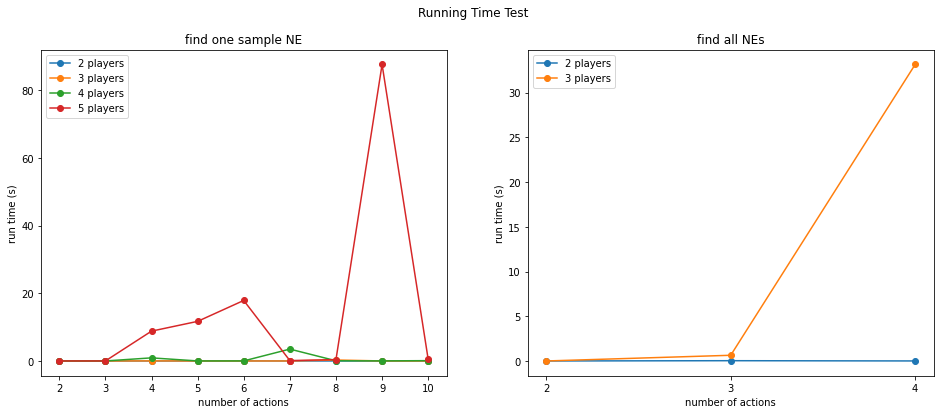

In [7]:
# draw plot
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1, 2, figsize=(16,6))
for n in range(2, n_1_max+1):
    ax[0].plot(range(2, m_1_max+1), T_one[n-2], '-o', label='{} players'.format(n))    
for n in range(2, n_all_max+1):    
    ax[1].plot(range(2, m_all_max+1), T_all[n-2], '-o', label='{} players'.format(n))
    ax[0].set_xticks(range(2, m_all_max+1))
for i in [0,1]:    
    ax[i].set_xlabel('number of actions')
    ax[i].set_ylabel('run time (s)')
    ax[i].legend()
ax[0].set_xticks(range(2, m_1_max+1))
ax[1].set_xticks(range(2, m_all_max+1))
ax[0].set_title('find one sample NE')
ax[1].set_title('find all NEs')
fig.suptitle('Running Time Test')
plt.show()